### https://scikit-learn.org/stable/user_guide.html

### Data loading

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Look into the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: ylabel='temp_max'>

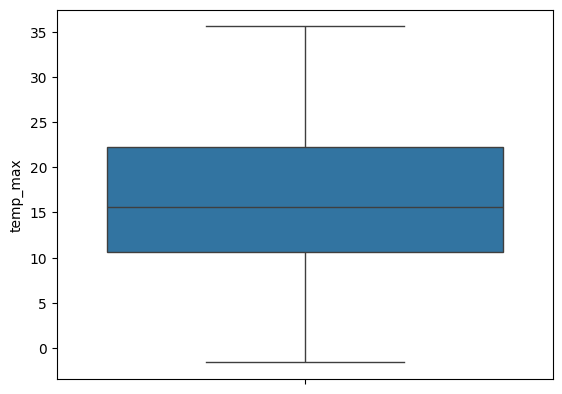

In [10]:
sns.boxplot(df['temp_max'])

In [11]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [14]:
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

In [15]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,quarter
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,1


In [16]:
df = df.drop(['weather','date'],axis=1)

### Data preparation

In [ ]:
!pip install sklearn

### Model construction

#### Features and target separation

In [18]:
X = df.drop('wind',axis=1)
Y = df['wind']

#### Train / Test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15)

In [21]:
X_train.head()

,precipitation,temp_max,temp_min,month,quarter
293,0.5,11.1,6.1,10,4
210,0.0,22.8,15.0,7,3
439,0.0,14.4,8.9,3,1
1437,54.1,15.6,10.0,12,4
1140,0.3,14.4,6.7,2,1


In [22]:
Y_train.head()

,wind
293,5.7
210,2.0
439,4.3
1437,6.2
1140,2.9


#### Model selection and training(FIT)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
model.coef_

array([ 0.05851652, -0.04625867,  0.05094314,  0.06923223, -0.3111969 ])

In [27]:
model.intercept_

3.7373588661405885

#### Quality check

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(Y_test, model.predict(X_test))

1.12707344466693

In [32]:
mean_absolute_error(Y_test, model.predict(X_test)) / np.mean(df['wind'])

0.3477402282132884

#### Polynomial

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly = PolynomialFeatures(3)

In [35]:
poly_X = poly.fit_transform(X)

In [38]:
poly_X.shape

(1461, 56)

In [36]:
X.shape

(1461, 5)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(poly_X,Y, test_size=0.15)
model = LinearRegression()
model.fit(X_train, Y_train)
mean_absolute_error(Y_test, model.predict(X_test))

1.0540969031014757